In [2]:
import pandas as pd
df = pd.read_csv("ecommerce.csv", encoding="latin1")


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
#This data contains transactional data from an ecommerce store which has 9994 rows and 21 columns including 6 numeric features and 15 categorical (object) features.

In [7]:
df['Order Date'] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df["Shipping_Delay"] = (df["Ship Date"] - df["Order Date"]).dt.days

In [8]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df[["Sales","Profit","Discount","Quantity"]].describe()

,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


In [11]:
df[["Sales","Profit","Discount","Quantity"]].median()

,0
Sales,54.4900
Profit,8.6665
Discount,0.2000
Quantity,3.0000


In [12]:
(df["Profit"] < 0).sum()

np.int64(1871)

In [13]:
df[df["Profit"] < 0][["Sales", "Discount", "Quantity"]].describe()


,Sales,Discount,Quantity
count,1871.000000,1871.000000,1871.000000
mean,250.511574,0.480887,3.762694
std,715.067296,0.235080,2.141347
min,0.444000,0.100000,1.000000
25%,12.503000,0.200000,2.000000
50%,71.088000,0.400000,3.000000
75%,284.922000,0.700000,5.000000
max,22638.480000,0.800000,14.000000


In [14]:
#A significant portion of loss-making transactions are driven by high discounting on relatively low-quantity orders, indicating inefficient discount strategies.


**EDA**

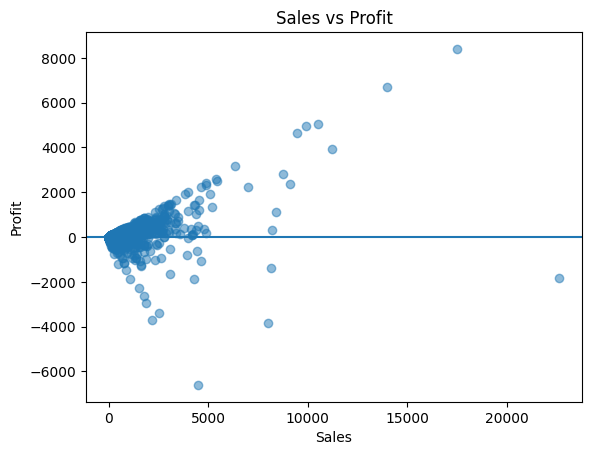

In [15]:
#Sales vs Profit chart
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Sales"], df["Profit"], alpha=0.5)
plt.axhline(0)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")
plt.show()


The analysis shows that higher sales do not necessarily refers into higher profit. Several high-sales transactions result in losses, mainly due to inefficient discounting strategies. Most profitable transactions are saturated within a moderate sales range (approximately 0–5,000), indicatingg that controlled pricing and discounting results in
 profitability more effectively than high sales volume alone.

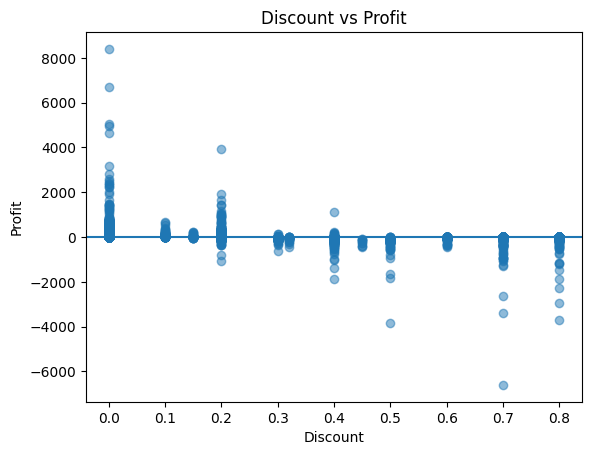

In [16]:
#Discount Impact on Profit
plt.figure()
plt.scatter(df["Discount"], df["Profit"], alpha=0.5)
plt.axhline(0)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit")
plt.show()


Profit declines sharply as discount rates increase. Transactions with discounts exceeding 40–50% are loss-making or yield minimal profit. products discounted within the 0–20% range generate the highest profits, suggesting that moderate discounting is optimal for maintaining profitability.

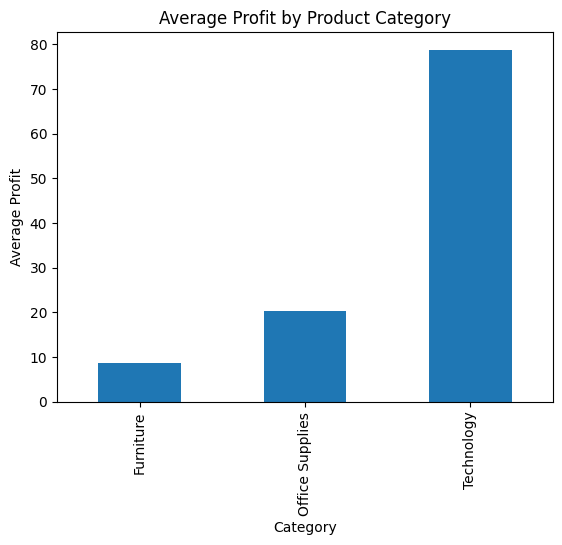

In [17]:
#Profit by Category

df.groupby("Category")["Profit"].mean().plot(kind="bar")
plt.ylabel("Average Profit")
plt.title("Average Profit by Product Category")
plt.show()


The Technology category exhibits the highest average profit,majorly outperforming Office Supplies and Furniture. This indicates that technology products offer stronger margins and represent a main revenue opportunity for the store/business
.

In [18]:
#Profit by subcategory
df.groupby("Sub-Category")["Profit"].mean().sort_values().head(10)


,Profit
Sub-Category,
Tables,-55.565771
Bookcases,-15.230509
Supplies,-6.258418
Fasteners,4.375660
Art,8.200737
Furnishings,13.645918
Labels,15.236962
Binders,19.843574
Paper,24.856620


Among sub-categories, Tables (under Furniture category) contribute the highest average losses, while Copiers (under Technology category) generate the highest average profit. This suggests that pricing, discounting, or cost structures for tables may require reassessment, while copiers represent a high-value product line in the data
.

Feature **Engineering**

In [19]:
df["High_Discount"] = (df["Discount"] >= 0.4).astype(int)
df["Is_Loss"] = (df["Profit"] < 0).astype(int)


In [20]:
df['Order_Month'] = df['Order Date'].dt.month

The columns Row ID,Order ID,Customer ID,Product Name,City,State can be deleted to prevent overfitting(these columns have high cardinality).

In [21]:
model_df = df[["Profit",
        "Sales",
        "Quantity",
        "Discount",
        "Shipping_Delay",
        "High_Discount",
        "Order_Month",
        "Category",
        "Sub-Category",
        "Region",
        "Segment",
        "Ship Mode"]]


In [22]:
model_df = pd.get_dummies(
    model_df,
    columns=["Category", "Sub-Category", "Region", "Segment", "Ship Mode"],
    drop_first=True
)


In [23]:
X = model_df.drop("Profit", axis=1)
y = model_df["Profit"]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
X_train.shape, X_test.shape


((7995, 32), (1999, 32))

In [27]:
X_train.isna().sum().sum()


np.int64(0)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [29]:
y_pred_lr = lr.predict(X_test_scaled)


In [30]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, mae_lr, r2_lr


(np.float64(281.8931714235208), 66.62103225240004, -0.6389306791315275)

In [31]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=6  # prevents overfitting
)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=6, random_state=42)

In [32]:
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

rmse_dt, mae_dt, r2_dt


(np.float64(289.87212853099106), 45.289339289752995, -0.7330232638581891)

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=8,
    n_jobs=-1
)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=200, n_jobs=-1, random_state=42)

In [34]:
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, mae_rf, r2_rf


(np.float64(222.27055387458898), 31.450204189389307, -0.018955779568082365)

In [35]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf],
    "MAE": [mae_lr, mae_dt, mae_rf],
    "R2": [r2_lr, r2_dt, r2_rf]
})

results


,Model,RMSE,MAE,R2
0,Linear Regression,281.893171,66.621032,-0.638931
1,Decision Tree,289.872129,45.289339,-0.733023
2,Random Forest,222.270554,31.450204,-0.018956


Random Forest performs best among the tested models, reducing average prediction error significantly compared to linear and tree-based baselines.

Linear regression and Decision tree didnt worked up to the mark as Profit is influenced by many external and unobserved factors such as supplier costs, operational expenses, and return rates, which are not present in the dataset i performed feature enginerring on. As a result, while discounting and category information provide some signal, the overall variance in profit remains difficult to explain at a transaction level .


**Business** **Recommendations** i would suggest from my findings,
1. Re-evaluate High Discount Strategies
   as transactions with discounts above 40–50% consistently result in negative or near-zero profit.

2. Focus on High-Margin Product Categories
   Technology category generates the highest average profit, with sub-categories like Copiers performing exceptionally good.

3. Address Loss-Making Sub-Categories
   as i found that Tables (Furniture) consistently show negative average profit, so this needs a constant check.

4. Optimize Discounting Based on Order Size
   Few Loss-making orders often involve high discounts on low-quantity purchases.

5. Use ML Models as Decision Support, Not Automation
   Profit prediction is noisy and messy too due to missing operational cost factors, limiting model precision.

